In [31]:
import numpy as np
import pandas as pd
import  matplotlib.pyplot as plt
import seaborn as sns


In [17]:
credit_df = pd.read_csv("DataSet/credits_amazon.csv")
credit_df
title_df = pd.read_csv("DataSet/titles_amazon.csv")
title_df

,id,title,type,description,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_id,imdb_score,imdb_votes,tmdb_popularity,tmdb_score
0,ts20945,The Three Stooges,SHOW,The Three Stooges were an American vaudeville ...,1934,TV-PG,19,"['comedy', 'family', 'animation', 'action', 'f...",['US'],26.0,tt0850645,8.6,1092.0,15.424,7.6
1,tm19248,The General,MOVIE,"During America’s Civil War, Union spies steal ...",1926,NaN,78,"['action', 'drama', 'war', 'western', 'comedy'...",['US'],NaN,tt0017925,8.2,89766.0,8.647,8.0
2,tm82253,The Best Years of Our Lives,MOVIE,It's the hope that sustains the spirit of ever...,1946,NaN,171,"['romance', 'war', 'drama']",['US'],NaN,tt0036868,8.1,63026.0,8.435,7.8
3,tm83884,His Girl Friday,MOVIE,"Hildy, the journalist former wife of newspaper...",1940,NaN,92,"['comedy', 'drama', 'romance']",['US'],NaN,tt0032599,7.8,57835.0,11.270,7.4
4,tm56584,In a Lonely Place,MOVIE,An aspiring actress begins to suspect that her...,1950,NaN,94,"['thriller', 'drama', 'romance']",['US'],NaN,tt0042593,7.9,30924.0,8.273,7.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9866,tm510327,Lily Is Here,MOVIE,Dallas and heroin have one thing in common: Du...,2021,NaN,93,['drama'],['US'],NaN,tt7672388,5.3,20.0,1.406,NaN
9867,tm1079144,Jay Nog: Something from Nothing,MOVIE,Something From Nothing takes you on a stand-up...,2021,NaN,55,['comedy'],['US'],NaN,tt15041600,NaN,NaN,0.600,NaN
9868,tm847725,Chasing,MOVIE,A cop from Chennai sets out to nab a dreaded d...,2021,NaN,116,['crime'],['IN'],NaN,NaN,NaN,NaN,1.960,NaN
9869,tm1054116,Baikunth,MOVIE,"This story is about prevalent caste problem, e...",2021,NaN,72,"['family', 'drama']",[],NaN,tt14331982,8.4,49.0,0.645,NaN


In [6]:
credit_df.sample(5)

,person_id,id,name,character,role
18307,11349,tm107967,Burton Gilliam,Welder,ACTOR
36723,704483,tm157428,Frank L. Bare II,Roomer,ACTOR
15301,73157,tm85012,Alan Hale Jr.,Tiny,ACTOR
1317,49043,tm71517,Minor Watson,Mr. Griswald,ACTOR
1733,132035,tm77319,Clinton Rosemond,Black Man on Train (uncredited),ACTOR


In [7]:
credit_df.shape

(124235, 5)

In [8]:
credit_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 124235 entries, 0 to 124234
Data columns (total 5 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   person_id  124235 non-null  int64 
 1   id         124235 non-null  object
 2   name       124235 non-null  object
 3   character  107948 non-null  object
 4   role       124235 non-null  object
dtypes: int64(1), object(4)
memory usage: 4.7+ MB


In [12]:
credit_df.isnull().sum()

person_id        0
id               0
name             0
character    16287
role             0
dtype: int64

In [10]:
round(100*(credit_df.isnull().sum()/len(credit_df.index)),2).sort_values(ascending = False)

character    13.11
role          0.00
name          0.00
id            0.00
person_id     0.00
dtype: float64

In [13]:
# replace null values with 'No Data'
credit_df['character'].replace(np.nan, 'No Data', inplace = True)

In [14]:
credit_df.duplicated().sum()

56

In [18]:
title_df.sample(5) 

,id,title,type,description,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_id,imdb_score,imdb_votes,tmdb_popularity,tmdb_score
3095,tm143319,The Turn of the Screw,MOVIE,"A young governess, Ann, is sent to a country h...",2009,PG-13,89,"['drama', 'thriller', 'horror']",['GB'],NaN,tt4797606,5.5,1415.0,6.250,5.3
4060,tm675932,Grapes on a Vine,MOVIE,Kyle is the art director at the High Museum in...,2008,NaN,81,['drama'],['US'],NaN,tt1094297,6.8,69.0,0.600,NaN
3806,tm859688,Torn,MOVIE,A man finds himself torn between pursuing a re...,2010,NaN,90,['drama'],['XX'],NaN,NaN,NaN,NaN,0.629,NaN
8247,tm916194,French Biriyani,MOVIE,A French expatriate and an auto driver go on a...,2020,NaN,116,['comedy'],['IN'],NaN,tt12344410,5.8,1002.0,1.360,10.0
6443,ts78296,Breathe,SHOW,"Kabir, a brilliant but non-conventional office...",2018,TV-MA,39,"['crime', 'drama', 'thriller']",['IN'],1.0,tt6466208,8.4,19289.0,6.445,7.8


In [ ]:
title_df = title_df.drop(columns = ['seasons', 'age_certification'])

In [20]:
title_df['tmdb_score'] = title_df['tmdb_score'].fillna(title_df['tmdb_score'].mode()[0])
title_df['imdb_votes'] = title_df['imdb_votes'].fillna(title_df['imdb_votes'].mode()[0])
title_df['imdb_score'] = title_df['imdb_score'].fillna(title_df['imdb_score'].mode()[0])
title_df['tmdb_popularity'] = title_df['tmdb_popularity'].fillna(title_df['tmdb_popularity'].mode()[0])
title_df['imdb_id'].replace(np.nan, 'No Data',inplace  = True)
title_df['description'].replace(np.nan, 'No Data',inplace  = True)

In [28]:
title_df['production_countries'] = title_df['production_countries'].str[2:4]
for i in range(len(title_df['production_countries'])):
    if title_df['production_countries'][i] == '':
        title_df['production_countries'][i] = 'Unknown'

C:\Users\panka\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [29]:
credit_df.sample(5)

,person_id,id,name,character,role
45902,1213657,tm191600,Isai Rivera Blas,Humberto Lopez,ACTOR
26693,105228,tm96267,Mac Mohan,Jagmohan,ACTOR
69137,327773,tm176274,Jim Roof,Chester,ACTOR
109289,614165,tm941298,Michael Croner,Rob Chambers,ACTOR
58969,208882,tm118569,Alana Austin,Wood Faerie,ACTOR


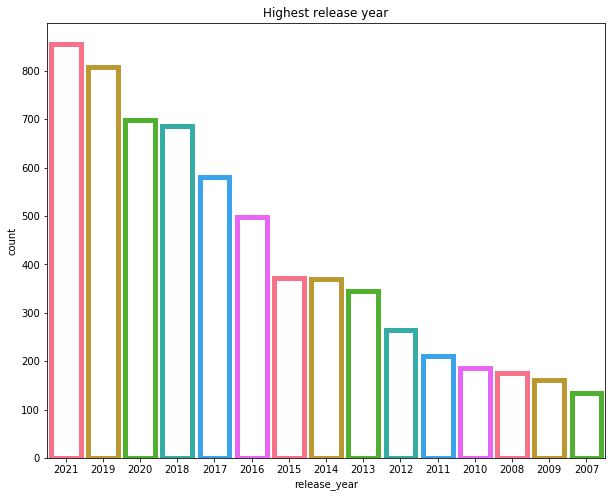

In [32]:
plt.figure(figsize = (10,8))
plt.title('Highest release year')
sns.countplot(x='release_year', data = title_df,order = title_df['release_year'].value_counts().index[:15], facecolor=(0,0,0,0),linewidth =5, edgecolor = sns.color_palette("husl"))

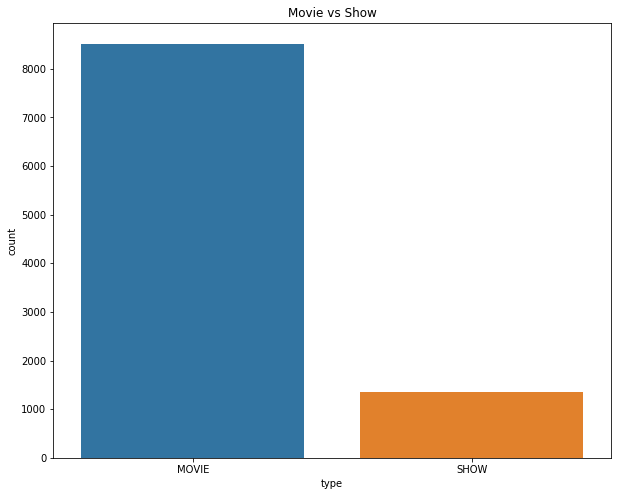

In [33]:
plt.figure(figsize = (10,8))
plt.title('Movie vs Show')
sns.countplot(x='type', data = title_df,order = title_df['type'].value_counts().index[:15] ,linewidth =5)

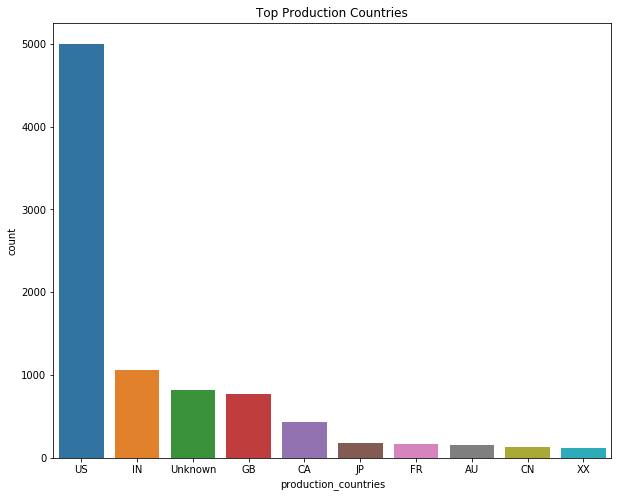

In [34]:
plt.figure(figsize = (10,8))
plt.title('Top Production Countries')
sns.countplot(x='production_countries', data = title_df,order = title_df['production_countries'].value_counts().index[:10] ,linewidth =5)

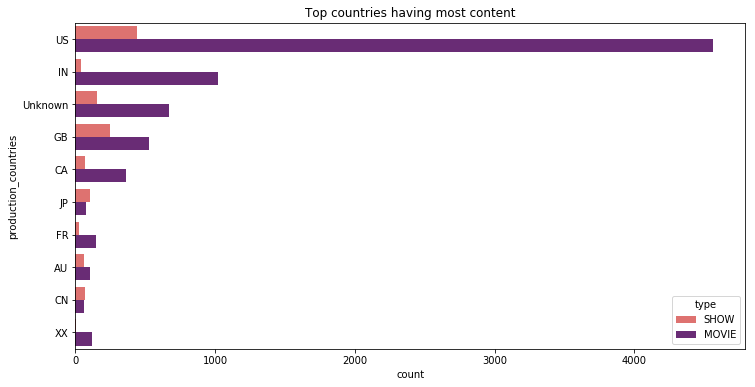

In [35]:
fig = plt.figure(figsize=(12,6))
sns.countplot(data = title_df,y = 'production_countries', order = title_df["production_countries"].value_counts().index[0:10],hue = 'type',palette = 'magma_r')
plt.title("Top countries having most content")
plt.show()
        